<a href="https://colab.research.google.com/github/abiralchy0987/movie_recommendation_system/blob/main/Accuracy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Content filtering


import numpy as np
import pandas as pd
import matplotlib as plt
import os

#reading the data
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/tmdb_5000_credits.csv')

movies.head(2)

#head shows only one row of the dataset because of the parameter (1)
credits.head(1)

movies.shape

#shape shows how many rows and columns are available in the dataset
credits.shape

#integration of datasets movies and credits
movies = movies.merge(credits , on = 'title')

movies.head(1)

#visualising the integrated datasets
#previously movies had 20 columns and credits had four columns and since
#it was integrated on the column "title" which was same on both the datasets
#the new number of columns present is 23
movies.shape


movies.columns

#cleaning data
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

#data preprocessing
#checking for missing values
movies.isnull().sum()

#dropping the rows with missing value because there is very small number of data with missing value
movies.dropna(inplace=True)

movies.duplicated().sum()

movies.iloc[0]['genres']

import ast
def convert(text):
  l=[]
  for i in ast.literal_eval(text):
    l.append(i['name'])

  return l


movies['genres']=movies['genres'].apply(convert)

movies['keywords']=movies['keywords'].apply(convert)

import ast
def convert_cast(text):
  l=[]
  counter=0
  for i in ast.literal_eval(text):
    if counter<3:
     l.append(i['name'])
    counter+=1

  return l

movies['cast']=movies['cast'].apply(convert_cast)

import ast
def fetch_director(text):
  l=[]
  for i in ast.literal_eval(text):
    if i['job'] == 'Director':
     l.append(i['name'])
     break

  return l

movies['crew']=movies['crew'].apply(fetch_director)



movies['overview']=movies['overview'].apply(lambda x:x.split())

def remove_space(word):
  l = []
  for i in word:
    l.append(i.replace(" ",""))
  return l


movies['cast']=movies['cast'].apply(remove_space)

movies['crew']=movies['crew'].apply(remove_space)

movies['tags']= movies['overview']+movies['keywords']+movies['genres']+movies['cast']+movies['crew']

new_df = movies[['movie_id','title','tags']]

new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem(text):
  l = []
  for i in text.split():
    l.append(ps.stem(i))

  return " ".join(l)

new_df['tags'] = new_df['tags'].apply(stem)


nltk.download('stopwords')

words_clean=[]
for word in new_df['tags']:
 stopwords = nltk.corpus.stopwords.words('english')
if word not in stopwords:
     l = []
for i in word.split():
     l.append(ps.stem(i))
     words_clean.append(" ".join(l))
else:
         words_clean.append(word)
         print(words_clean)
# def stem(text):
#   l = []
#   for i in text.split():
#     l.append(ps.stem(i))

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector= cv.fit_transform(new_df['tags']).toarray()


from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

new_df[new_df['title'] == 'Spider-Man'].index[0]

def recommend(movie):
  movie_index = new_df[new_df['title'] == movie].index[0]
  distances =sorted(list(enumerate(similarity[movie_index])),reverse=True, key = lambda x: x[1])
  for i in distances[1:6]:
    print(new_df.iloc[i[0]].title)


recommend('Spider-Man')

<ipython-input-1-bc96b97cf622>:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
<ipython-input-1-bc96b97cf622>:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
<ipython-input-1-bc96b97cf622>:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

['ever', 'ever sinc', 'ever sinc the', 'ever sinc the second', 'ever sinc the second grade', 'ever sinc the second grade when', 'ever sinc the second grade when he', 'ever sinc the second grade when he first', 'ever sinc the second grade when he first saw', 'ever sinc the second grade when he first saw her', 'ever sinc the second grade when he first saw her in', 'ever sinc the second grade when he first saw her in e.t.', 'ever sinc the second grade when he first saw her in e.t. the', 'ever sinc the second grade when he first saw her in e.t. the extraterrestrial,', 'ever sinc the second grade when he first saw her in e.t. the extraterrestrial, brian', 'ever sinc the second grade when he first saw her in e.t. the extraterrestrial, brian herzl', 'ever sinc the second grade when he first saw her in e.t. the extraterrestrial, brian herzl ha', 'ever sinc the second grade when he first saw her in e.t. the extraterrestrial, brian herzl ha had', 'ever sinc the second grade when he first saw her

In [ ]:
#collaborative filtering

import pandas as pd

# Load the datasets
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

ratings_df.shape

movies_df.head(1)

ratings_df.head(1)

movies = pd.merge(ratings_df, movies_df, on='movieId')


# Remove duplicates if any
movies = movies.drop_duplicates()


# Create the User-Item Rating Matrix (pivot table)
user_item_matrix = movies.pivot(index='userId', columns='movieId', values='rating')

# Display the shape and first few entries of the matrix
print(user_item_matrix.shape)
print(user_item_matrix.head())


# Calculate the global average rating
global_avg_rating = movies['rating'].mean()

# Fill NaN values with the global average rating
user_item_matrix_filled = user_item_matrix.fillna(global_avg_rating)


user_item_matrix_filled.head(1)

!pip install scikit-surprise

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize SVD model
svd = SVD()

# Train the model
svd.fit(trainset)

# Predict ratings on the testset
predictions = svd.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


# Predict the rating for a specific user-item pair
user_id = 1  # Example user
movie_id = 50  # Example movie

predicted_rating = svd.predict(user_id, movie_id).est
print(f"Predicted rating for User {user_id} on Movie {movie_id}: {predicted_rating}")


import heapq

def recommend_movies(user_id, top_n=10):
    """Recommends top N movies for a specific user.

    Args:
        user_id (int): The ID of the user.
        top_n (int, optional): The number of movies to recommend. Defaults to 10.

    Returns:
        list: A list of movie titles.
    """

    # Get all movie IDs and create a dictionary for movieId -> title lookup
    movie_id_to_title = dict(zip(movies['movieId'], movies['title']))

    # Get all unique movie IDs
    all_movie_ids = movies['movieId'].unique()

    # Get the movies that the user has already rated
    rated_movies = set(movies[movies['userId'] == user_id]['movieId'])

    # Get the unrated movies
    unrated_movies = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movies]

    # Predict ratings for unrated movies
    predictions = [svd.predict(user_id, movie_id) for movie_id in unrated_movies]

    # Sort movies by predicted rating (highest first)
    recommended_movies = heapq.nlargest(top_n, predictions, key=lambda x: x.est)

    # Get movie titles from the top N predictions using the dictionary
    movie_titles = [movie_id_to_title[rec.iid] for rec in recommended_movies]

    return movie_titles

# Example usage:
user_id = 1  # Example user ID
recommended_movies = recommend_movies(user_id, top_n=10)
print(f"Top 10 movie recommendations for User {user_id}: {recommended_movies}")

user_id_input = input("Enter your user ID: ")
try:
    user_id = int(user_id_input)  # Ensure the user ID is an integer
    recommended_movies = recommend_movies(user_id, top_n=10)
    print(f"Top 10 movie recommendations for User {user_id}: {recommended_movies}")
except ValueError:
    print("Invalid input. Please enter a valid integer for user ID.")


(610, 9724)
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN  

In [ ]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.8 MB/s eta 0:00:00


In [ ]:
from thefuzz import fuzz, process

def find_closest_movie(title_input):
    """
    Finds the closest matching movie title in new_df using fuzzy matching.
    Both the user input and the titles are compared in lowercase.
    """
    all_titles = new_df['title'].tolist()
    # Create a lowercase version for fuzzy matching
    all_titles_lower = [t.lower() for t in all_titles]
    title_input_lower = title_input.lower().strip()

    # Get the best match using fuzzy matching
    best_match, score = process.extractOne(title_input_lower, all_titles_lower, scorer=fuzz.partial_ratio)

    # Accept the match if the score is above a threshold (e.g., 60)
    if score > 60:
        # Return the original title (with proper casing) corresponding to the best match
        match_index = all_titles_lower.index(best_match)
        return new_df.iloc[match_index]['title']
    else:
        return None

def hybrid_recommend(user_id, movie_title, top_n=10):
    """
    Hybrid recommendation that returns half the recommendations from content-based filtering
    and half from collaborative filtering.

    Args:
        user_id (int): The ID of the user (for collaborative filtering).
        movie_title (str): The movie title used for content-based filtering (input is fuzzy-matched).
        top_n (int): Total number of recommendations to return.

    Returns:
        list: A list of recommended movie titles.
    """
    # Determine how many movies to take from each recommender
    n_content = top_n // 2
    n_collab = top_n - n_content  # This ensures if top_n is odd, collaborative gets the extra slot

    # ----------- Content-Based Filtering -----------
    # Find the closest matching movie title
    matched_movie = find_closest_movie(movie_title)
    if not matched_movie:
        print(f"Sorry, we couldn't find a close match for '{movie_title}'. Please try another title.")
        return []

    print(f"Using content-based match: '{matched_movie}'")

    # Get the index for the matched movie from new_df
    try:
        movie_index = new_df[new_df['title'] == matched_movie].index[0]
    except IndexError:
        print(f"Movie '{matched_movie}' not found in the dataset.")
        return []

    # Get similarity scores for all movies relative to the matched movie
    content_scores = list(enumerate(similarity[movie_index]))
    # Sort scores in descending order (most similar first)
    content_scores = sorted(content_scores, key=lambda x: x[1], reverse=True)

    # Build content-based recommendation list (skip the first entry as it is the movie itself)
    content_recs = []
    for idx, score in content_scores[1:]:
        rec_title = new_df.iloc[idx]['title']
        if rec_title not in content_recs:
            content_recs.append(rec_title)
        if len(content_recs) >= n_content:
            break

    # ----------- Collaborative Filtering -----------
    # Get a larger pool from collaborative filtering so we can remove any duplicates later
    collab_pool = recommend_movies(user_id, top_n=top_n * 2)
    # Remove any movies that already appeared in the content-based recommendations
    collab_recs = [m for m in collab_pool if m not in content_recs]
    # Select the top n_collab recommendations
    collab_recs = collab_recs[:n_collab]

    # ----------- Merge Recommendations -----------
    final_recs = content_recs + collab_recs

    # In case there are not enough unique recommendations, try to fill from the collaborative pool
    if len(final_recs) < top_n:
        extra_needed = top_n - len(final_recs)
        extra_from_collab = [m for m in collab_pool if m not in final_recs]
        final_recs += extra_from_collab[:extra_needed]

    return final_recs

# ---------------------------
# Example Usage
# ---------------------------

# Get user input
try:
    user_id = int(input("Enter your user ID: "))
except ValueError:
    print("Invalid user ID. Please enter an integer value.")
    user_id = None

if user_id is not None:
    movie_title = input("Enter a movie title you like: ")

    recommendations = hybrid_recommend(user_id, movie_title, top_n=10)

    if recommendations:
        print("\nHybrid Recommendations (50% Content-Based, 50% Collaborative):")
        for i, title in enumerate(recommendations, 1):
            print(f"{i}. {title}")


Enter your user ID: 5
Enter a movie title you like: batman
Using content-based match: 'Batman v Superman: Dawn of Justice'

Hybrid Recommendations (50% Content-Based, 50% Collaborative):
1. Man of Steel
2. Thor
3. Suicide Squad
4. Superman III
5. Superman
6. Lawrence of Arabia (1962)
7. Fifth Element, The (1997)
8. There Will Be Blood (2007)
9. Manhattan (1979)
10. Paths of Glory (1957)


In [ ]:
# Root Mean Squared Error (RMSE)is a commonly used metric for evaluating the accuracy of predicted ratings in collaborative filtering. It measures the difference between predicted and actual ratings.

from surprise import accuracy

# Assuming you have already trained your model and made predictions
predictions = svd.test(testset)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 0.8673
RMSE: 0.8673485568818441


In [ ]:
#  Mean Absolute Error (MAE)is another metric for evaluating the accuracy of predicted ratings. It is less sensitive to outliers compared to RMSE.

mae = accuracy.mae(predictions)
print(f'MAE: {mae}')

MAE:  0.6681
MAE: 0.6681184780800197


In [ ]:
# Precision@K and Recall@K are used to evaluate the quality of top-N recommendations. Precision@K measures the proportion of recommended items that are relevant, while Recall@K measures the proportion of relevant items that are recommended.

from collections import defaultdict #improting  defaultdict from collections
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user."""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

# Example usage
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)
print(f'Precision@10: {sum(prec for prec in precisions.values()) / len(precisions)}')
print(f'Recall@10: {sum(rec for rec in recalls.values()) / len(recalls)}')


Precision@10: 0.7986648682461494
Recall@10: 0.5312977408209858


In [ ]:
#  F1-Score is the harmonic mean of precision and recall, providing a single metric that balances both.

from sklearn.metrics import f1_score
import numpy as np # import numpy for array operations


# Assuming 'predictions' contains the output of your model
# Extract true and predicted ratings
true_ratings = [pred.r_ui for pred in predictions]  # True ratings
predicted_ratings = [pred.est for pred in predictions]  # Predicted ratings

# If you need binary relevance (relevant/not relevant):
threshold = 3.5  # Example threshold for relevance
# Convert true_ratings to a NumPy array before comparison
true_labels = np.array(true_ratings) >= threshold
# Convert predicted_ratings to a NumPy array before comparison
predicted_labels = np.array(predicted_ratings) >= threshold

# Calculate the F1-score
f1 = f1_score(true_labels, predicted_labels)
print(f'F1-Score: {f1}')

F1-Score: 0.7369696969696969


In [ ]:
# Mean Average Precision (MAP) is another metric that evaluates the quality of ranked recommendations. It is particularly useful when you have a list of recommended items and you want to evaluate how well the relevant items are ranked.

from sklearn.metrics import average_precision_score

# Assuming you have already trained your model and made predictions
predictions = svd.test(testset)

# Assuming you have binary relevance labels (1 for relevant, 0 for not relevant)
# Extract true and predicted ratings
true_ratings = [pred.r_ui for pred in predictions]  # True ratings
predicted_ratings = [pred.est for pred in predictions]  # Predicted ratings

# If you need binary relevance (relevant/not relevant):
threshold = 3.5  # Example threshold for relevance
# Convert true_ratings to a NumPy array before comparison
true_labels = np.array(true_ratings) >= threshold
# Convert predicted_ratings to a NumPy array before comparison
predicted_labels = np.array(predicted_ratings) >= threshold

# Use predicted_ratings (or predicted_labels for binary case) as predicted scores
map_score = average_precision_score(true_labels, predicted_ratings) # Using predicted_ratings as scores

print(f'Mean Average Precision: {map_score}')


Mean Average Precision: 0.8370011345825094


In [ ]:
# Normalized Discounted Cumulative Gain (NDCG) is used to evaluate the ranking quality of recommendations. It gives more weight to relevant items that appear higher in the recommendation list.

from sklearn.metrics import ndcg_score
import numpy as np

# Assuming you have already trained your model and made predictions
predictions = svd.test(testset)

# Extract true and predicted ratings
true_ratings = [pred.r_ui for pred in predictions]  # True ratings
predicted_ratings = [pred.est for pred in predictions]  # Predicted ratings

# Use true_ratings as true relevance scores
# You may need to adjust this if your relevance scores are different
true_relevance_scores = np.array([true_ratings])  # Reshape to 2D array

# Use predicted_ratings as predicted scores
predicted_scores = np.array([predicted_ratings])  # Reshape to 2D array

# Calculate NDCG
ndcg = ndcg_score(true_relevance_scores, predicted_scores)
print(f'NDCG: {ndcg}')

NDCG: 0.987975166236332


In [ ]:
# Coverage measures the percentage of items in the catalog that the recommendation system is able to recommend.

def coverage(predictions, catalog_size):
    recommended_items = set()
    for uid, _, _, est, _ in predictions:
        if est >= threshold:
            recommended_items.add(uid)
    return len(recommended_items) / catalog_size

# Example usage
catalog_size = len(movies['movieId'].unique())
coverage_score = coverage(predictions, catalog_size)
print(f'Coverage: {coverage_score}')

Coverage: 0.05892636774989716


In [ ]:
# Diversity measures how different the recommended items are from each other. It can be calculated using various methods, such as cosine similarity or Jaccard similarity.

from sklearn.metrics.pairwise import cosine_similarity

def diversity(recommended_items):
    # This is a placeholder, replace with your actual item vector function
    def item_vector(item):
        # This could represent features like genre, actors, etc.
        # For example, you might have a dictionary mapping item IDs to vectors
        # item_vectors = {1: [0.2, 0.5, 0.8], 2: [0.1, 0.7, 0.3], ...}
        # Then you can return item_vectors.get(item, [])  # Default to empty vector if not found
        return [0.1, 0.2, 0.3] # Replace with your logic to get the vector for an item

    item_vectors = [item_vector(item) for item in recommended_items]
    similarity_matrix = cosine_similarity(item_vectors)
    return 1 - similarity_matrix.mean()

# Example usage:
# Define a list of recommended items. These could be movie IDs, product IDs, etc.
# Replace with the actual output from your recommendation system
recommended_items = [1, 2, 3, 4, 5]

diversity_score = diversity(recommended_items)
print(f'Diversity: {diversity_score}')

Diversity: 1.1102230246251565e-16


In [ ]:
# Serendipity measures how surprising the recommendations are to the user. It can be calculated by comparing the recommendations to the user's historical preferences.

def serendipity(user_history, recommended_items):
    unexpected_items = [item for item in recommended_items if item not in user_history]
    return len(unexpected_items) / len(recommended_items)

# Example usage
user_history = set(movies[movies['userId'] == user_id]['movieId'])
serendipity_score = serendipity(user_history, recommended_items)
print(f'Serendipity: {serendipity_score}')

Serendipity: 0.8


In [ ]:
# User Satisfaction (via A/B Testing)

# Example of A/B testing setup
# Group A: Control group (existing recommendation system)
# Group B: Test group (new recommendation system)

# You'll need to define the 'calculate_ctr' function first.
# It should take a group (A or B) as input and return the CTR.
def calculate_ctr(group):
  """
  Calculates the Click-Through Rate (CTR) for a group.

  Args:
    group: The group data (e.g., list of user interactions).

  Returns:
    The CTR for the group.
  """
  # Replace this with your logic to calculate CTR.
  # For example, you might have:
  # clicks = sum(1 for interaction in group if interaction['clicked'])
  # impressions = len(group)
  # ctr = clicks / impressions if impressions else 0
  # return ctr
  # Here, I'm using a placeholder value.
  return 0.1  # Placeholder CTR value

# Example Data for groups (replace with your actual data)
group_A = []  # Control group
group_B = []  # Test group

# Measure CTR for both groups
ctr_A = calculate_ctr(group_A)
ctr_B = calculate_ctr(group_B)

print(f'CTR for Group A: {ctr_A}')
print(f'CTR for Group B: {ctr_B}')

CTR for Group A: 0.1
CTR for Group B: 0.1


Precision: 0.8159824046920822
Recall: 0.3424615384615385
F1-Score: 0.48244473342002603
AUC-ROC: 0.774407613056298


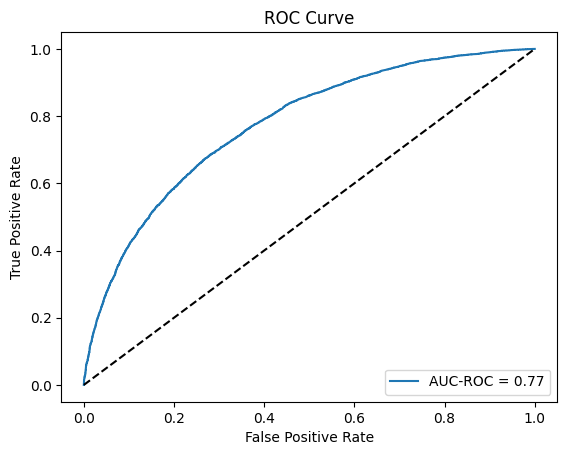

Confusion Matrix:
[[9665  753]
 [6411 3339]]


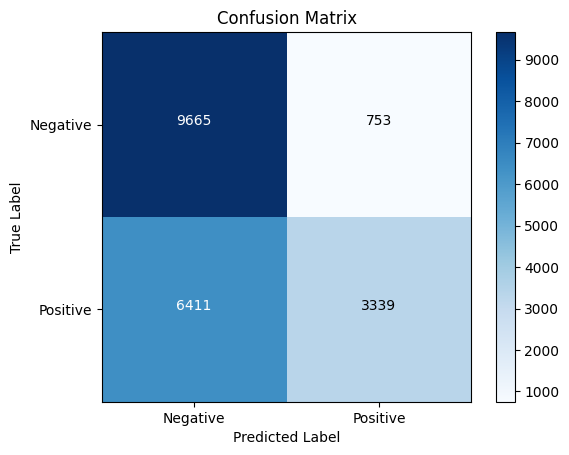

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Get the true ratings and predicted ratings from the test set
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Convert ratings to binary classification (e.g., ratings >= 4 are positive)
true_labels = [1 if rating >= 4 else 0 for rating in true_ratings]
predicted_labels = [1 if rating >= 4 else 0 for rating in predicted_ratings]

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Calculate AUC-ROC
auc_roc = roc_auc_score(true_labels, predicted_ratings)
print(f'AUC-ROC: {auc_roc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_ratings)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure()
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()

Precision: 81.60%
Recall: 34.25%
F1-Score: 48.24%
AUC-ROC: 77.44%


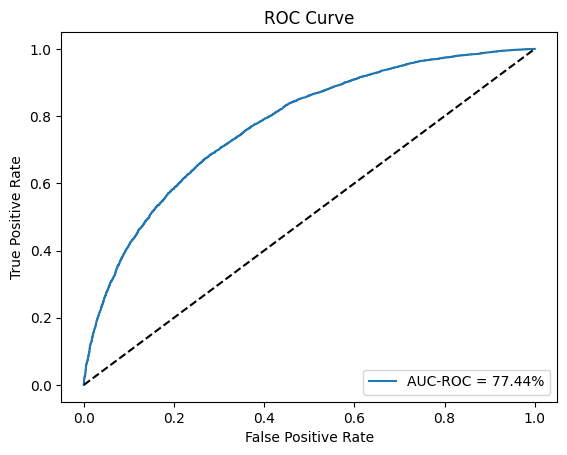

Confusion Matrix:
[[9665  753]
 [6411 3339]]


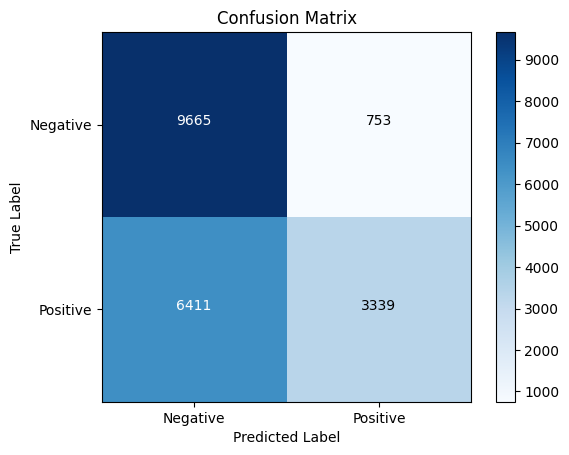

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Get the true ratings and predicted ratings from the test set
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Convert ratings to binary classification (e.g., ratings >= 4 are positive)
true_labels = [1 if rating >= 4 else 0 for rating in true_ratings]
predicted_labels = [1 if rating >= 4 else 0 for rating in predicted_ratings]

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Convert metrics to percentages
precision_percent = precision * 100
recall_percent = recall * 100
f1_percent = f1 * 100

print(f'Precision: {precision_percent:.2f}%')
print(f'Recall: {recall_percent:.2f}%')
print(f'F1-Score: {f1_percent:.2f}%')

# Calculate AUC-ROC
auc_roc = roc_auc_score(true_labels, predicted_ratings)
auc_roc_percent = auc_roc * 100
print(f'AUC-ROC: {auc_roc_percent:.2f}%')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_ratings)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc_percent:.2f}%')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure()
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()

Precision: 81.60%
Recall: 34.25%
F1-Score: 48.24%
AUC-ROC: 77.44%


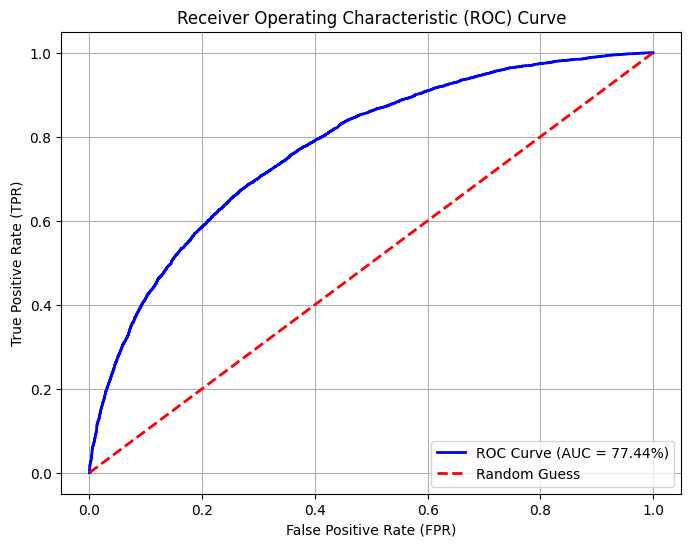

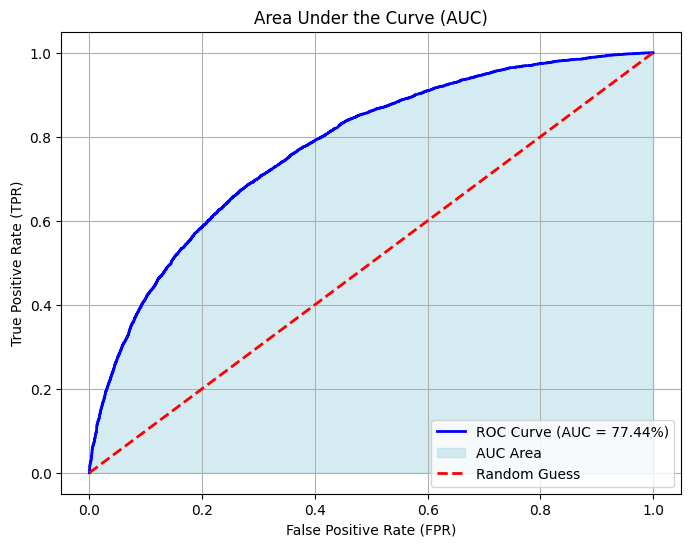

Confusion Matrix:
[[9665  753]
 [6411 3339]]


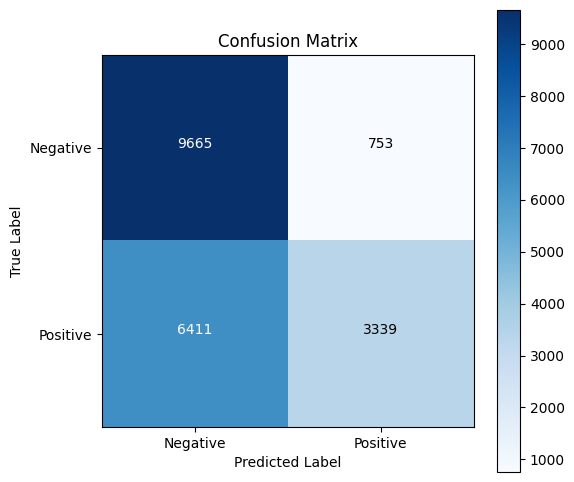

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get the true ratings and predicted ratings from the test set
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Convert ratings to binary classification (e.g., ratings >= 4 are positive)
true_labels = [1 if rating >= 4 else 0 for rating in true_ratings]
predicted_labels = [1 if rating >= 4 else 0 for rating in predicted_ratings]

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Convert metrics to percentages
precision_percent = precision * 100
recall_percent = recall * 100
f1_percent = f1 * 100

print(f'Precision: {precision_percent:.2f}%')
print(f'Recall: {recall_percent:.2f}%')
print(f'F1-Score: {f1_percent:.2f}%')

# Calculate AUC-ROC
auc_roc = roc_auc_score(true_labels, predicted_ratings)
auc_roc_percent = auc_roc * 100
print(f'AUC-ROC: {auc_roc_percent:.2f}%')

# Compute ROC curve (FPR, TPR, thresholds)
fpr, tpr, thresholds = roc_curve(true_labels, predicted_ratings)

# -------------------------------
# Plot ROC Curve
# -------------------------------
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_roc_percent:.2f}%)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# -------------------------------
# Plot AUC Curve (Shaded Area Under ROC Curve)
# -------------------------------
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_roc_percent:.2f}%)')
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.5, label='AUC Area')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Area Under the Curve (AUC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# -------------------------------
# Confusion Matrix
# -------------------------------
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()